In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import string
import os
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop = set(stopwords.words('english'))
import gensim
from tqdm.notebook import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [167]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [168]:
train.iloc[1]

id                                               4
keyword                                        NaN
location                                       NaN
text        Forest fire near La Ronge Sask. Canada
target                                           1
Name: 1, dtype: object

In [169]:
def create_corpus(target):
    corpus = []
    
    for x in train.loc[train['target'] == target, 'text'].str.split():
        for i in x:
            corpus.append(i)
            
    return corpus
corpus = create_corpus(0)
len(corpus)

63848

In [170]:
dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word] += 1
print(len(dic.items()))  
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
top[0]

148


('the', 1524)

<BarContainer object of 10 artists>

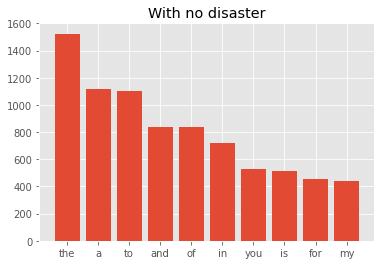

In [171]:
#[:10] give the first 10 items in the dict
#if without it, the graph will print out all items 
x, y = zip(*top)
plt.title('With no disaster')
plt.bar(x, y)

138


<BarContainer object of 10 artists>

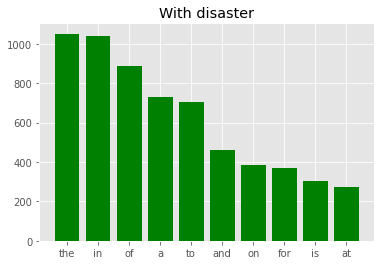

In [172]:
corpus = create_corpus(1)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
        
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)
print(len(top))
t_op = top[:10]
x, y = zip(*t_op)
plt.title('With disaster')
plt.bar(x, y, color='green')

<BarContainer object of 20 artists>

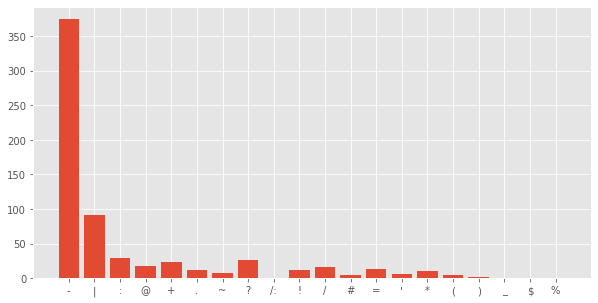

In [173]:
# for punctuation 
plt.figure(figsize=(10, 5)) #figsize (10,5) is for size of x and y axis
corpus = create_corpus(0)

dic = defaultdict(int)

special = string.punctuation
for i in corpus:
    if i in special:
        dic[i] += 1
        
x, y = zip(*dic.items())
plt.bar(x, y)

<BarContainer object of 18 artists>

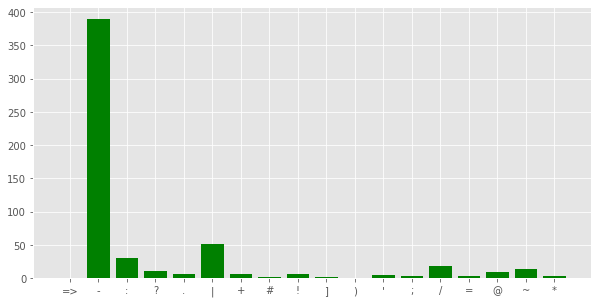

In [174]:
plt.figure(figsize=(10, 5))
corpus = create_corpus(1)

dic = defaultdict(int)

special = string.punctuation
for i in corpus:
    if i in special:
        dic[i] += 1
        
x, y = zip(*dic.items())
plt.bar(x, y, color='green')

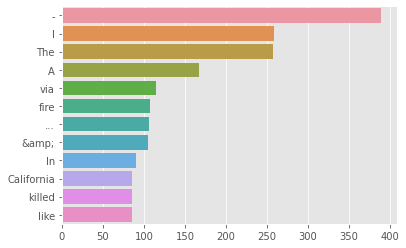

In [175]:
counter = Counter(corpus)
most_common = counter.most_common()

x = list()
y = list()

for word, count in most_common[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x, orient='h')


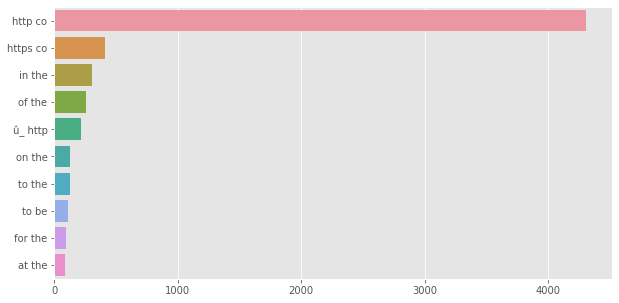

In [176]:
def get_top_tweet_bigrams(corpus, n=10):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

plt.figure(figsize=(10, 5))
top_tweet_bigrams = get_top_tweet_bigrams(train['text'])[:10]
x, y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

In [177]:
df = pd.concat([train, test])
df.shape

(10876, 5)

In [178]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub('', text)

example = 'New competition launched: https://www.kaggle.com/c/nlp-getting-started'

remove_URL(example)

'New competition launched: '

In [0]:
df['text'] = df['text'].apply(lambda x: remove_URL(x))

In [0]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    
    return html.sub('', text) #sub means substitue or replace 

In [181]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [0]:
df['text'] = df['text'].apply(lambda x: remove_html(x))

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)


In [0]:
df['text'] = df['text'].apply(lambda x: remove_emoji(x))

In [0]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    
    return text.translate(table)

In [0]:
df['text'] = df['text'].apply(lambda x: remove_punct(x))

In [187]:
keywords = train.keyword.unique()[1:]
keywords=list(map(lambda x: x.replace('%20', ' '), keywords))
len(keywords)

221

In [188]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
wnl = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    sentence_words = sentence.split(' ')
    new_sentence_words = list()
    
    for sentence_word in sentence_words:
        sentence_word = sentence_word.replace('#', '')
        new_sentence_word = wnl.lemmatize(sentence_word.lower(), wordnet.VERB)
        new_sentence_words.append(new_sentence_word)
        
    new_sentence = ' '.join(new_sentence_words)
    new_sentence = new_sentence.strip()
    
    return new_sentence

In [190]:
a = "winter is coming"
print(a.strip())

winter is coming


In [0]:
df['text'] = df['text'].apply(lambda x: lemmatize_sentence(x))

In [0]:
import torch
from torch.nn import functional as F
from torch.autograd import Variable
from torchtext import data
from torchtext import datasets
from torchtext.vocab import Vectors, GloVe

In [0]:
# save train text validation into seperated files 
def prepare_csv(df_train, df_test, seed=27, val_ratio=0.2):
    idx = np.arange(df_train.shape[0])
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    val_size = int(len(idx) * val_ratio)
    
    if not os.path.exists('cache'): # cache is tem memory file 
        os.makedirs('cache')
    
    df_train.iloc[idx[val_size:], :][['id', 'target', 'text']].to_csv(
        'cache/dataset_train.csv', index=False
    )
    
    df_train.iloc[idx[:val_size], :][['id', 'target', 'text']].to_csv(
        'cache/dataset_val.csv', index=False
    )
    
    df_test[['id', 'text']].to_csv('cache/dataset_test.csv',
                   index=False)

In [0]:
def get_iterator(dataset, batch_size, train=True,
                 shuffle=True, repeat=False):
    
    device = torch.device('cuda:0' if torch.cuda.is_available()
                          else 'cpu')
    
    dataset_iter = data.Iterator(
        dataset, batch_size=batch_size, device=device,
        train=train, shuffle=shuffle, repeat=repeat,
        sort=False
    )
    
    return dataset_iter

In [0]:
import logging
from copy import deepcopy

LOGGER = logging.getLogger('tweets_dataset')

def get_dataset(fix_length=100, lower=False, vectors=None):
    
    if vectors is not None:
        lower=True
        
    LOGGER.debug('Preparing CSV files...')
    prepare_csv(train, test)
    
    TEXT = data.Field(sequential=True, 
#                       tokenize='spacy', 
                      lower=True, 
                      include_lengths=True, 
                      batch_first=True, 
                      fix_length=25)
    LABEL = data.Field(use_vocab=True,
                       sequential=False,
                       dtype=torch.float16)
    ID = data.Field(use_vocab=False,
                    sequential=False,
                    dtype=torch.float16)
    
    
    LOGGER.debug('Reading train csv files...')
    
    train_temp, val_temp = data.TabularDataset.splits(
        path='cache/', format='csv', skip_header=True,
        train='dataset_train.csv', validation='dataset_val.csv',
        fields=[
            ('id', ID),
            ('target', LABEL),
            ('text', TEXT)
        ]
    )
    
    LOGGER.debug('Reading test csv file...')
    
    test_temp = data.TabularDataset(
        path='cache/dataset_test.csv', format='csv',
        skip_header=True,
        fields=[
            ('id', ID),
            ('text', TEXT)
        ]
    )
    
    LOGGER.debug('Building vocabulary...')
    
    TEXT.build_vocab(
        train_temp, val_temp, test_temp,
        max_size=20000,
        min_freq=10,
        vectors=GloVe(name='6B', dim=300)  # We use it for getting vocabulary of words
    )
    LABEL.build_vocab(
        train_temp
    )
    ID.build_vocab(
        train_temp, val_temp, test_temp
    )
    
    word_embeddings = TEXT.vocab.vectors
    vocab_size = len(TEXT.vocab)
    
    train_iter = get_iterator(train_temp, batch_size=32, 
                              train=True, shuffle=True,
                              repeat=False)
    val_iter = get_iterator(val_temp, batch_size=32, 
                            train=True, shuffle=True,
                            repeat=False)
    test_iter = get_iterator(test_temp, batch_size=32, 
                             train=False, shuffle=False,
                             repeat=False)
    
    
    LOGGER.debug('Done preparing the datasets')
    
    return TEXT, vocab_size, word_embeddings, train_iter, val_iter, test_iter


In [0]:
TEXT, vocab_size, word_embeddings, train_iter, val_iter, test_iter = get_dataset()

In [0]:
class LSTMClassifier(torch.nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, weights):
        super(LSTMClassifier, self).__init__()
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.word_embeddings = torch.nn.Embedding(vocab_size,
                                                  embedding_dim)
        self.word_embeddings.weight = torch.nn.Parameter(weights,
                                                         requires_grad=False)
        
        self.dropout_1 = torch.nn.Dropout(0.3)
        self.lstm = torch.nn.LSTM(embedding_dim,
                                  hidden_dim,
                                  n_layers,
                                  dropout=0.3,
                                  batch_first=True)
        
        self.dropout_2 = torch.nn.Dropout(0.3)
        self.label_layer = torch.nn.Linear(hidden_dim, output_size)
        
        self.act = torch.nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        x = self.word_embeddings(x)
        
        x = self.dropout_1(x)
        
        lstm_out, hidden = self.lstm(x, hidden)
                
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout_2(lstm_out)
        out = self.label_layer(out)    
        
        out = out.view(batch_size, -1, self.output_size)
        out = out[:, -1, :]

        out = self.act(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        
        return hidden

In [0]:
def train_model(model, train_iter, val_iter, optim, loss, num_epochs, batch_size=32):
    h = model.init_hidden(batch_size)
    
    clip = 5
    val_loss_min = np.Inf
    
    total_train_epoch_loss = list()
    total_train_epoch_acc = list()
        
    total_val_epoch_loss = list()
    total_val_epoch_acc = list()
        
    
    device = torch.device('cuda:0' if torch.cuda.is_available()
                           else 'cpu')
    
    for epoch in range(num_epochs):

        model.train()
        
        train_epoch_loss = list()
        train_epoch_acc = list()
        
        val_epoch_loss = list()
        val_epoch_acc = list()
        
        for idx, batch in enumerate(tqdm(train_iter)):
            h = tuple([e.data for e in h])

            text = batch.text[0]
            target = batch.target
            target = target - 1
            target = target.type(torch.LongTensor)

            text = text.to(device)
            target = target.to(device)

            optim.zero_grad()
            
            if text.size()[0] is not batch_size:
                continue
            
            prediction, h = model(text, h)
                
            loss_train = loss(prediction.squeeze(), target)
            loss_train.backward()

            num_corrects = (torch.max(prediction, 1)[1].
                                view(target.size()).data == target.data).float().sum()

            acc = 100.0 * num_corrects / len(batch)

            train_epoch_loss.append(loss_train.item())
            train_epoch_acc.append(acc.item())
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
            
            optim.step()
    
        print(f'Train Epoch: {epoch}, Training Loss: {np.mean(train_epoch_loss):.4f}, Training Accuracy: {np.mean(train_epoch_acc): .2f}%')

        model.eval()

        with torch.no_grad():
            for idx, batch in enumerate(tqdm(val_iter)):
                val_h = tuple([e.data for e in h])

                text = batch.text[0]
                target = batch.target
                target = target - 1
                target = target.type(torch.LongTensor)
                
                text = text.to(device)
                target = target.to(device)
                
                if text.size()[0] is not batch_size:
                    continue

                prediction, h = model(text, h)
                loss_val = loss(prediction.squeeze(), target)

                num_corrects = (torch.max(prediction, 1)[1].
                                view(target.size()).data == target.data).float().sum()

                acc = 100.0 * num_corrects / len(batch)

                val_epoch_loss.append(loss_val.item())
                val_epoch_acc.append(acc.item())
                
            print(f'Vadlidation Epoch: {epoch}, Training Loss: {np.mean(val_epoch_loss):.4f}, Training Accuracy: {np.mean(val_epoch_acc): .2f}%')
                
            if np.mean(val_epoch_loss) <= val_loss_min:
                torch.save(model.state_dict(), 'state_dict.pth')
                print('Validation loss decreased ({:.6f} --> {:.6f})'.
                      format(val_loss_min, np.mean(val_epoch_loss)))
                
                val_loss_min = np.mean(val_epoch_loss)
                
        total_train_epoch_loss.append(np.mean(train_epoch_loss))
        total_train_epoch_acc.append(np.mean(train_epoch_acc))
    
        total_val_epoch_loss.append(np.mean(val_epoch_loss))
        total_val_epoch_acc.append(np.mean(val_epoch_acc))
    
    return (total_train_epoch_loss, total_train_epoch_acc,
            total_val_epoch_loss, total_val_epoch_acc)

In [199]:
lr = 1e-4
batch_size = 32
output_size = 2
hidden_size = 128
embedding_length = 300

model = LSTMClassifier(vocab_size=vocab_size, 
                       output_size=output_size, 
                       embedding_dim=embedding_length,
                       hidden_dim=hidden_size,
                       n_layers=2,
                       weights=word_embeddings
)

device = torch.device('cuda:0' if torch.cuda.is_available()
                      else 'cpu')
    
model.to(device)
optim = torch.optim.Adam(model.parameters(), lr=lr)
loss = torch.nn.CrossEntropyLoss()
    
train_loss, train_acc, val_loss, val_acc = train_model(model=model,train_iter=train_iter,val_iter=val_iter,optim=optim,loss=loss,num_epochs=50,batch_size=batch_size)


Train Epoch: 0, Training Loss: 0.6799, Training Accuracy:  57.15%



Vadlidation Epoch: 0, Training Loss: 0.6471, Training Accuracy:  56.12%
Validation loss decreased (inf --> 0.647142)



Train Epoch: 1, Training Loss: 0.6101, Training Accuracy:  67.80%



Vadlidation Epoch: 1, Training Loss: 0.5793, Training Accuracy:  73.74%
Validation loss decreased (0.647142 --> 0.579307)



Train Epoch: 2, Training Loss: 0.5512, Training Accuracy:  76.05%



Vadlidation Epoch: 2, Training Loss: 0.5512, Training Accuracy:  75.73%
Validation loss decreased (0.579307 --> 0.551153)



Train Epoch: 3, Training Loss: 0.5412, Training Accuracy:  76.61%



Vadlidation Epoch: 3, Training Loss: 0.5509, Training Accuracy:  75.07%
Validation loss decreased (0.551153 --> 0.550946)



Train Epoch: 4, Training Loss: 0.5344, Training Accuracy:  77.24%



Vadlidation Epoch: 4, Training Loss: 0.5478, Training Accuracy:  75.00%
Validation loss decreased (0.550946 --> 0.547810)



Train Epoch: 5, Training Loss: 0.5319, Training Accuracy:  77.47%



Vadlidation Epoch: 5, Training Loss: 0.5407, Training Accuracy:  75.93%
Validation loss decreased (0.547810 --> 0.540690)



Train Epoch: 6, Training Loss: 0.5266, Training Accuracy:  77.81%



Vadlidation Epoch: 6, Training Loss: 0.5365, Training Accuracy:  76.60%
Validation loss decreased (0.540690 --> 0.536497)



Train Epoch: 7, Training Loss: 0.5251, Training Accuracy:  78.26%



Vadlidation Epoch: 7, Training Loss: 0.5409, Training Accuracy:  76.20%



Train Epoch: 8, Training Loss: 0.5211, Training Accuracy:  78.32%



Vadlidation Epoch: 8, Training Loss: 0.5384, Training Accuracy:  76.66%



Train Epoch: 9, Training Loss: 0.5231, Training Accuracy:  78.19%



Vadlidation Epoch: 9, Training Loss: 0.5359, Training Accuracy:  76.80%
Validation loss decreased (0.536497 --> 0.535933)



Train Epoch: 10, Training Loss: 0.5150, Training Accuracy:  79.01%



Vadlidation Epoch: 10, Training Loss: 0.5309, Training Accuracy:  77.39%
Validation loss decreased (0.535933 --> 0.530879)



Train Epoch: 11, Training Loss: 0.5142, Training Accuracy:  79.23%



Vadlidation Epoch: 11, Training Loss: 0.5321, Training Accuracy:  77.19%



Train Epoch: 12, Training Loss: 0.5127, Training Accuracy:  79.39%



Vadlidation Epoch: 12, Training Loss: 0.5304, Training Accuracy:  77.66%
Validation loss decreased (0.530879 --> 0.530356)



Train Epoch: 13, Training Loss: 0.5125, Training Accuracy:  79.10%



Vadlidation Epoch: 13, Training Loss: 0.5304, Training Accuracy:  77.13%



Train Epoch: 14, Training Loss: 0.5091, Training Accuracy:  79.79%



Vadlidation Epoch: 14, Training Loss: 0.5276, Training Accuracy:  77.46%
Validation loss decreased (0.530356 --> 0.527636)



Train Epoch: 15, Training Loss: 0.5070, Training Accuracy:  79.95%



Vadlidation Epoch: 15, Training Loss: 0.5348, Training Accuracy:  76.93%



Train Epoch: 16, Training Loss: 0.5063, Training Accuracy:  80.05%



Vadlidation Epoch: 16, Training Loss: 0.5332, Training Accuracy:  76.73%



Train Epoch: 17, Training Loss: 0.5067, Training Accuracy:  79.92%



Vadlidation Epoch: 17, Training Loss: 0.5306, Training Accuracy:  77.06%



Train Epoch: 18, Training Loss: 0.5056, Training Accuracy:  79.90%



Vadlidation Epoch: 18, Training Loss: 0.5306, Training Accuracy:  77.39%



Train Epoch: 19, Training Loss: 0.4997, Training Accuracy:  80.89%



Vadlidation Epoch: 19, Training Loss: 0.5389, Training Accuracy:  76.46%



Train Epoch: 20, Training Loss: 0.5043, Training Accuracy:  80.10%



Vadlidation Epoch: 20, Training Loss: 0.5331, Training Accuracy:  76.93%



Train Epoch: 21, Training Loss: 0.5009, Training Accuracy:  80.62%



Vadlidation Epoch: 21, Training Loss: 0.5363, Training Accuracy:  77.06%



Train Epoch: 22, Training Loss: 0.4961, Training Accuracy:  81.09%



Vadlidation Epoch: 22, Training Loss: 0.5366, Training Accuracy:  76.66%



Train Epoch: 23, Training Loss: 0.4982, Training Accuracy:  80.86%



Vadlidation Epoch: 23, Training Loss: 0.5289, Training Accuracy:  77.66%



Train Epoch: 24, Training Loss: 0.4996, Training Accuracy:  80.64%



Vadlidation Epoch: 24, Training Loss: 0.5352, Training Accuracy:  76.46%



Train Epoch: 25, Training Loss: 0.4954, Training Accuracy:  81.07%



Vadlidation Epoch: 25, Training Loss: 0.5318, Training Accuracy:  76.86%



Train Epoch: 26, Training Loss: 0.4977, Training Accuracy:  81.00%



Vadlidation Epoch: 26, Training Loss: 0.5305, Training Accuracy:  77.06%



Train Epoch: 27, Training Loss: 0.4941, Training Accuracy:  81.35%



Vadlidation Epoch: 27, Training Loss: 0.5271, Training Accuracy:  77.79%
Validation loss decreased (0.527636 --> 0.527090)



Train Epoch: 28, Training Loss: 0.4954, Training Accuracy:  81.38%



Vadlidation Epoch: 28, Training Loss: 0.5355, Training Accuracy:  76.40%



Train Epoch: 29, Training Loss: 0.4916, Training Accuracy:  81.66%



Vadlidation Epoch: 29, Training Loss: 0.5322, Training Accuracy:  77.53%



Train Epoch: 30, Training Loss: 0.4894, Training Accuracy:  81.71%



Vadlidation Epoch: 30, Training Loss: 0.5359, Training Accuracy:  76.66%



Train Epoch: 31, Training Loss: 0.4886, Training Accuracy:  81.74%



Vadlidation Epoch: 31, Training Loss: 0.5403, Training Accuracy:  76.73%



Train Epoch: 32, Training Loss: 0.4898, Training Accuracy:  82.17%



Vadlidation Epoch: 32, Training Loss: 0.5341, Training Accuracy:  76.93%



Train Epoch: 33, Training Loss: 0.4880, Training Accuracy:  82.09%



Vadlidation Epoch: 33, Training Loss: 0.5280, Training Accuracy:  77.46%



Train Epoch: 34, Training Loss: 0.4871, Training Accuracy:  82.27%



Vadlidation Epoch: 34, Training Loss: 0.5319, Training Accuracy:  77.73%



Train Epoch: 35, Training Loss: 0.4870, Training Accuracy:  82.12%



Vadlidation Epoch: 35, Training Loss: 0.5337, Training Accuracy:  77.06%



Train Epoch: 36, Training Loss: 0.4858, Training Accuracy:  82.34%



Vadlidation Epoch: 36, Training Loss: 0.5339, Training Accuracy:  76.86%



Train Epoch: 37, Training Loss: 0.4831, Training Accuracy:  82.75%



Vadlidation Epoch: 37, Training Loss: 0.5331, Training Accuracy:  77.46%



Train Epoch: 38, Training Loss: 0.4860, Training Accuracy:  82.06%



Vadlidation Epoch: 38, Training Loss: 0.5343, Training Accuracy:  77.26%



Train Epoch: 39, Training Loss: 0.4826, Training Accuracy:  82.48%



Vadlidation Epoch: 39, Training Loss: 0.5287, Training Accuracy:  77.33%



Train Epoch: 40, Training Loss: 0.4824, Training Accuracy:  82.99%



Vadlidation Epoch: 40, Training Loss: 0.5319, Training Accuracy:  77.53%



Train Epoch: 41, Training Loss: 0.4791, Training Accuracy:  83.04%



Vadlidation Epoch: 41, Training Loss: 0.5259, Training Accuracy:  77.93%
Validation loss decreased (0.527090 --> 0.525903)



Train Epoch: 42, Training Loss: 0.4809, Training Accuracy:  82.96%



Vadlidation Epoch: 42, Training Loss: 0.5370, Training Accuracy:  76.80%



Train Epoch: 43, Training Loss: 0.4803, Training Accuracy:  82.86%



Vadlidation Epoch: 43, Training Loss: 0.5307, Training Accuracy:  77.59%



Train Epoch: 44, Training Loss: 0.4747, Training Accuracy:  83.52%



Vadlidation Epoch: 44, Training Loss: 0.5283, Training Accuracy:  77.73%



Train Epoch: 45, Training Loss: 0.4790, Training Accuracy:  83.08%



Vadlidation Epoch: 45, Training Loss: 0.5336, Training Accuracy:  76.73%



Train Epoch: 46, Training Loss: 0.4765, Training Accuracy:  83.21%



Vadlidation Epoch: 46, Training Loss: 0.5342, Training Accuracy:  76.93%



Train Epoch: 47, Training Loss: 0.4751, Training Accuracy:  83.17%



Vadlidation Epoch: 47, Training Loss: 0.5353, Training Accuracy:  76.80%



Train Epoch: 48, Training Loss: 0.4754, Training Accuracy:  83.45%



Vadlidation Epoch: 48, Training Loss: 0.5336, Training Accuracy:  77.39%



Train Epoch: 49, Training Loss: 0.4731, Training Accuracy:  83.65%



Vadlidation Epoch: 49, Training Loss: 0.5269, Training Accuracy:  77.53%


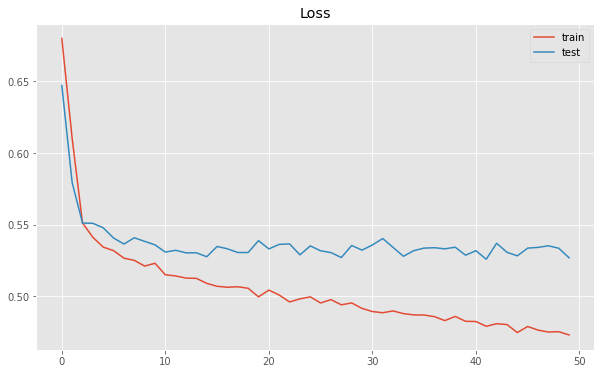

In [200]:
plt.figure(figsize=(10, 6))
plt.title('Loss')
sns.lineplot(range(len(train_loss)), train_loss, label='train')
sns.lineplot(range(len(val_loss)), val_loss, label='test')


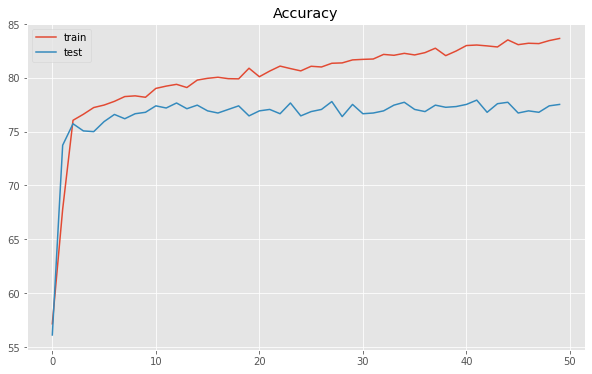

In [201]:
plt.figure(figsize=(10, 6))
plt.title('Accuracy')
sns.lineplot(range(len(train_acc)), train_acc, label='train')
sns.lineplot(range(len(val_acc)), val_acc, label='test')

In [202]:
results_target = list()
model.load_state_dict(torch.load("state_dict.pth"))

with torch.no_grad():
    for batch in tqdm(test_iter):
        for text, idx in zip(batch.text[0], batch.id):
            text = text.unsqueeze(0)
            res, _ = model(text, hidden=None)

            target = np.round(res.cpu().numpy())
            
            results_target.append(target[0][1])

In [0]:
sample_submission['target'] = list(map(int, results_target))

In [204]:
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [0]:
sample_submission.to_csv('submission3.csv', index=False)
